 # Análisis Exploratorio de Datos (EDA) sobre Salarios en el campo Data Science


## Introducción

Realización de un analisis exploratorio de datos sobre salarios dentro del mundo de los datos.
Se van realizar utilizando el lenguaje de programación Python y diferentes librerías como numpy, pandas y matplotlib, entre otras. 
Los datos provienen de la plataforma Kaggle, e incluyen información relevante para el estudio que llevaremos a cabo.

## Objetivo

Conocer la distribución de salarios en el campo del data para toma de decisiones futuras

## Hipótesis

1. ¿Qué relación existe entre el salario y el nivel de estudios dentro del campo de Data? SALARY DATA
2. ¿Cuál es la diferencia de media de salarios entre los salarios relacionados con el data y lo de otros grupos de trabajo? Ej.: área de marketing, financiero y ventas. SALARY DATA 
3. ¿Qué relación tiene los años de experiencia y el salario? SALARY DATA
4. ¿Dentro del campo de data, hay diferencias entre los salarios de hombre y mujeres? SALARY DATA
5. Dentro del campo de data, ¿quién tiene mayor salario de entrada? AMBOS
6. Dentro del campo de data, cuál es la media de edad de los trabajadores Junior? Hay diferencia entre la media de edad entre hombres y mujeres junior?

## Librerías

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import squarify
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import random
import missingno as msno
from scipy.stats import mannwhitneyu, kruskal, chi2,  pearsonr

import warnings

warnings.filterwarnings('ignore')



## Carga de Datos

In [65]:
df2 = pd.read_csv(r'C:/Users/laura/Desktop/SALARY_ANALYSIS/data/Salary_Data.csv', sep = ',')

### Desripción de columnas de dataframe

***Columnas del data frame Salary_Data***


| Columnas | Descripción |
|----------|----------|
|Age|Edad del usuario.
|Gender| Género del usuario.
|Education_level|Nivel máximo de estudios finalizados por el usuario.
|Job Title| Nombre del puesto de trabajo que desempeña el usuario.
|Years of Experience| Años de experiencia en el puesto de trabajo.
|Salary| Salario anual.


## Primera exploración

In [66]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [67]:
df2.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [69]:
df2.size

40224

In [70]:
df2.shape

(6704, 6)

In [71]:
df2.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [72]:
df2.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [73]:
df2.isna().sum()/len(df2)*100

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
dtype: float64

In [74]:
df2.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [75]:
df2.describe(include=object).round(2)

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


**Cardinalidad**

In [76]:
cardinalidad2 = pd.DataFrame(columns=['cardinalidad','porcentaje_cardinalidad','tipo_de_dato','valores_unicos'],  index=df2.columns)


In [77]:
cardinalidad2['cardinalidad']= [df2[col].nunique() for col in df2.columns]
cardinalidad2['porcentaje_cardinalidad'] = (cardinalidad2['cardinalidad']/len(df2)*100).round(2)
cardinalidad2['tipo_de_dato'] = df2.dtypes
cardinalidad2['valores_unicos'] = [df2[col].unique() for col in df2.columns]

In [78]:
cardinalidad2

,cardinalidad,porcentaje_cardinalidad,tipo_de_dato,valores_unicos
Age,41,0.61,float64,"[32.0, 28.0, 45.0, 36.0, 52.0, 29.0, 42.0, 31...."
Gender,3,0.04,object,"[Male, Female, nan, Other]"
Education Level,7,0.10,object,"[Bachelor's, Master's, PhD, nan, Bachelor's De..."
Job Title,193,2.88,object,"[Software Engineer, Data Analyst, Senior Manag..."
Years of Experience,37,0.55,float64,"[5.0, 3.0, 15.0, 7.0, 20.0, 2.0, 12.0, 4.0, 1...."
Salary,444,6.62,float64,"[90000.0, 65000.0, 150000.0, 60000.0, 200000.0..."


In [79]:
# for i in df.select_dtypes(include=object):
    # print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

In [80]:
# for i in df.select_dtypes(exclude=object):
    # print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

## Limpieza

Buscamos las filas con valores nulos para job title.

In [81]:
rows_with_nan = df2[df2.isna().any(axis=1)]
rows_with_nan

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Las eliminamos ya que no  hay ningún tipo de dato en toda la fila.

In [82]:
df2 = df2.dropna(axis=0, how='all')

In [83]:
df2.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [84]:
len(df2['Job Title'].unique())

193

In [85]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [86]:
developers = df2[df2['Job Title'].str.startswith('Developer')].sort_values(by='Job Title')
developers
# solo tenemos un 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [87]:
df2['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

**Vamos a limpiar la columna Education level, filtrando por titulo conseguido**
Master's == 'Master's Degree'
Bachelor's == Bachelor's Degree

In [88]:
df2['Education Level'].replace(to_replace="Bachelor's", value="Bachelor's Degree", inplace=True)

In [89]:
df2['Education Level'].replace(to_replace="Master's", value="Master's Degree", inplace=True)

In [90]:
df2['Education Level'].replace(to_replace="phD", value="PhD", inplace=True)

In [91]:
df2['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', nan, 'High School'],
      dtype=object)

Inputación NaN en la columna Education Level.

In [92]:
show =pd.DataFrame(df2.groupby([ 'Gender','Education Level'])['Education Level'].count())
show

Education Level
Gender Education Level                   
Female Bachelor's Degree             1199
       High School                    251
       Master's Degree               1068
       PhD                            496
Male   Bachelor's Degree             1824
       High School                    185
       Master's Degree                791
       PhD                            873
Other  High School                     12
       Master's Degree                  2

In [93]:
show.unstack()

Education Level                                   
Education Level Bachelor's Degree High School Master's Degree    PhD
Gender                                                              
Female                     1199.0       251.0          1068.0  496.0
Male                       1824.0       185.0           791.0  873.0
Other                         NaN        12.0             2.0    NaN

imputamos la moda de education level para los hombres 

In [94]:
df2['Education Level'].fillna(value="Bachelor's Degree", inplace=True)

In [95]:
df2['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

In [96]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Imputación NaN en la columna Salary:

***Para Full Stack Engineer***

In [97]:
df_full = df2[df2['Job Title'].str.contains('Full Stack Engineer', case = False)]
df_full

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1205,27.0,Female,Master's Degree,Full Stack Engineer,3.0,100000.0
1208,47.0,Female,PhD,Full Stack Engineer,12.0,175000.0
1218,32.0,Male,Bachelor's Degree,Full Stack Engineer,5.0,115000.0
1222,42.0,Male,PhD,Full Stack Engineer,14.0,180000.0
1229,36.0,Female,Master's Degree,Full Stack Engineer,8.0,140000.0
...,...,...,...,...,...,...
3121,31.0,Female,Master's Degree,Full Stack Engineer,7.0,108799.0
3125,28.0,Female,Master's Degree,Full Stack Engineer,4.0,82697.0
3128,43.0,Male,Bachelor's Degree,Full Stack Engineer,18.0,152560.0
3133,29.0,Female,Bachelor's Degree,Full Stack Engineer,6.0,100358.0


In [98]:
df_full = df_full[df_full['Education Level']=="Master's Degree"]

In [99]:
df_full.groupby('Gender')['Salary'].mean()

Gender
Female    125574.096774
Male      131669.444444
Other     161393.000000
Name: Salary, dtype: float64

In [100]:
# df2.iloc[3136,-1].fillna(value=125574.096774, inplace=True)
# df2.loc[3136,['Salary']] = df2['Salary'].replace(to_replace="NaN", value="125574.096774", inplace=True)
# df2.loc[3136, ['Salary']].fillna(value=125574.096774, inplace=True) 

In [101]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [102]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


***Para Social M***

In [103]:
df_social = df2[df2['Job Title'].str.contains('Social M', case = False)]
df_social

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
25,28.0,Female,Bachelor's Degree,Social Media Specialist,3.0,45000.0
58,30.0,Female,Bachelor's Degree,Social Media Manager,4.0,55000.0
192,30.0,Female,Bachelor's Degree,Junior Social Media Manager,3.0,45000.0
221,31.0,Female,Bachelor's Degree,Junior Social Media Specialist,3.0,45000.0
5135,26.0,Female,Bachelor's Degree,Social Media Manager,3.0,55000.0
5163,26.0,Female,Bachelor's Degree,Social Media Manager,3.0,55000.0
5191,26.0,Female,Bachelor's Degree,Social Media Manager,3.0,55000.0
5219,26.0,Female,Bachelor's Degree,Social Media Manager,3.0,55000.0
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
5259,27.0,Female,Bachelor's Degree,Social Media Manager,3.0,55000.0


In [104]:
df2['Years of Experience'].fillna(value= df_social['Years of Experience'].mean(), inplace = True)

In [105]:
df_social['Salary'].mean()

55833.333333333336

In [106]:
# df2['Years of Experience'].fillna(value= df_social['Salary'].mean(), inplace = True)

# df2.iloc[5247,-1].fillna(value=55833.333333333336, inplace=True)
# df2.loc[5247,['Salary']] = df2['Salary'].replace(to_replace=NaN, value="55833.333333333336", inplace=True)
# df2.loc[5247, ['Salary']].fillna(value=55833.333333333336, inplace=True) 

In [107]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.000000,NaN
5247,26.0,Female,Bachelor's Degree,Social M,3.277778,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.000000,NaN


In [108]:
df2.loc[5247,['Salary']].astype(int)

ValueError: cannot convert float NaN to integer

***Para Sales Director***

In [109]:
df_sales = df2[df2['Job Title'].str.contains('Sales Director', case = False)]


In [110]:
df_sales = df_sales[df_sales['Gender']=="Male"].sort_values(by='Education Level')
df_sales

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
19,51.0,Male,Bachelor's Degree,Sales Director,22.0,180000.0
6656,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0
5078,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5091,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5104,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5117,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
6306,29.0,Male,Bachelor's Degree,Sales Director,6.0,75000.0
6326,39.0,Male,Bachelor's Degree,Sales Director,10.0,100000.0
6343,32.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0
6385,36.0,Male,Bachelor's Degree,Sales Director,6.0,75000.0


In [112]:
df_sales = df_sales[df_sales['Education Level']=="Bachelor's Degree"]
df_sales


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
19,51.0,Male,Bachelor's Degree,Sales Director,22.0,180000.0
6656,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0
5078,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5091,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5104,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
5117,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0
6306,29.0,Male,Bachelor's Degree,Sales Director,6.0,75000.0
6326,39.0,Male,Bachelor's Degree,Sales Director,10.0,100000.0
6343,32.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0
6385,36.0,Male,Bachelor's Degree,Sales Director,6.0,75000.0


In [113]:
df_sales['Salary'].mean()

113513.51351351352

In [114]:
df_sales['Salary'].fillna(value= df_sales['Salary'].mean(), inplace = True)

In [115]:
df_sales

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
19,51.0,Male,Bachelor's Degree,Sales Director,22.0,180000.000000
6656,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.000000
5078,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.000000
5091,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.000000
5104,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.000000
5117,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.000000
6306,29.0,Male,Bachelor's Degree,Sales Director,6.0,75000.000000
6326,39.0,Male,Bachelor's Degree,Sales Director,10.0,100000.000000
6343,32.0,Male,Bachelor's Degree,Sales Director,7.0,90000.000000
6385,36.0,Male,Bachelor's Degree,Sales Director,6.0,75000.000000


In [116]:
# df2['Salary'].fillna(value= df_sales['Salary'].mean(), inplace = True)

# df2.iloc[6455,-1].fillna(value=df_sales['Salary'].mean(), inplace=True)
# df2.loc[6455,['Salary']] = df2['Salary'].replace(to_replace=NaN, value="df_sales['Salary'].mean()", inplace=True)
# df2.loc[6455, ['Salary']].fillna(value=df_sales['Salary'].mean(), inplace=True) 

Creación de un Data Frame menor únicamente con datos sobre empleos relacionados con Data.

In [117]:
df_data = df2[df2['Job Title'].str.contains('Data', case=False)].sort_values(by='Job Title')

In [118]:
df_data['Job Title'].unique()

array(['Chief Data Officer', 'Data Analyst', 'Data Entry Clerk',
       'Data Scientist', 'Director of Data Science',
       'Junior Data Analyst', 'Junior Data Scientist',
       'Senior Data Analyst', 'Senior Data Engineer',
       'Senior Data Scientist'], dtype=object)

In [119]:
df_data.shape

(969, 6)

In [120]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 105 to 4836
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  969 non-null    float64
 1   Gender               969 non-null    object 
 2   Education Level      969 non-null    object 
 3   Job Title            969 non-null    object 
 4   Years of Experience  969 non-null    float64
 5   Salary               969 non-null    float64
dtypes: float64(3), object(3)
memory usage: 53.0+ KB


In [121]:
df_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Data Analyst,3.0,120000.0


In [122]:
df_data.describe(include=object).round(2)

,Gender,Education Level,Job Title
count,969,969,969
unique,2,3,10
top,Male,PhD,Data Scientist
freq,604,432,453


In [123]:
df_data.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,969.00,969.00,969.00
mean,33.65,9.00,148816.31
std,7.34,5.76,39938.55
min,23.00,0.00,35000.00
25%,28.00,5.00,120000.00
50%,31.00,8.00,150000.00
75%,41.00,13.00,180000.00
max,51.00,24.00,240000.00


In [124]:
df_data['Job Title'].value_counts()


Job Title
Data Scientist              453
Data Analyst                363
Senior Data Scientist        61
Director of Data Science     57
Junior Data Analyst          25
Senior Data Engineer          4
Senior Data Analyst           3
Chief Data Officer            1
Data Entry Clerk              1
Junior Data Scientist         1
Name: count, dtype: int64

**Vamos a reducir el numero de job titles filtrando por años de experiencia**
consideramos senior a partir de 5 años

In [125]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Scientist'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Scientist'

In [126]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Analyst'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Analyst'


In [127]:
df_data[df_data['Job Title'].str.contains('Clerk', case=False)]
# df_data.drop(df['Job Title'].str.contains('Clerk', case=False))

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
18,25.0,Female,Bachelor's Degree,Data Entry Clerk,0.0,35000.0


**También lo hacemos con el Education level, filtrando por titulo conseguido**
Master's == 'Master's Degree'
Bachelor's == Bachelor's Degree

In [128]:
df_data['Education Level'].unique()

array(['PhD', "Master's Degree", "Bachelor's Degree"], dtype=object)

In [129]:
df_data['Education Level'].replace(to_replace="Master's", value="Master's Degree", inplace=True)

In [130]:
df_data['Education Level'].replace(to_replace="Bachelor's", value="Bachelor's Degree", inplace=True)

In [131]:
df_data


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


## ANALISIS UNIVARIANTE - SALARY ##


### Salario total ###

In [ ]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


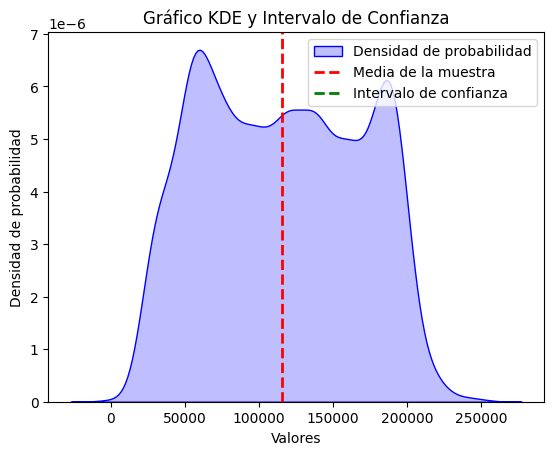

In [ ]:
# Calcular el intervalo de confianza para la media con un nivel de confianza del 95%
intervalo_confianza = stats.norm.interval(0.95, loc=np.mean(df2['Salary']), scale=stats.sem(df2['Salary']))

# Crear un gráfico KDE de los df2['Salary']
sns.kdeplot(df2['Salary'], shade=True, color='blue', label='Densidad de probabilidad')

# Agregar líneas para mostrar la media y el intervalo de confianza
media = np.mean(df2['Salary'])
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media de la muestra')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

# Agregar etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Gráfico KDE y Intervalo de Confianza')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from scipy.stats import kurtosis, skew
kurtosis_valor = kurtosis(df2['Salary'])
simetria_valor = skew(df2['Salary'])

print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 3:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 3:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor > 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor < 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")


kurtosis: nan
simetria: nan
La distribución es mesocúrtica, similar a una distribución normal.
La distribución es perfectamente simétrica alrededor de su media.


In [ ]:
from scipy.stats import shapiro
# Datos de ejemplo
datos = [23, 25, 27, 28, 30, 32, 33, 35, 35, 36]
# Prueba de Shapiro-Wilk
estadistico, p_valor = shapiro(df2['Salary'])
print(f'Estadístico de Shapiro-Wilk: {estadistico}\nP-Valor: {p_valor}')
# Interpretación del resultado
if p_valor > 0.05:
    print('No hay evidencia para rechazar la hipótesis nula. Los datos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')


Estadístico de Shapiro-Wilk: nan
P-Valor: 1.0
No hay evidencia para rechazar la hipótesis nula. Los datos siguen una distribución normal.


In [ ]:
plt.figure(figsize=(5,5))

sns.boxplot(data= df2['Salary'], palette=sns.color_palette('Set2'), legend= 'full')
plt.title('Boxplot')
plt.legend()
plt.show();

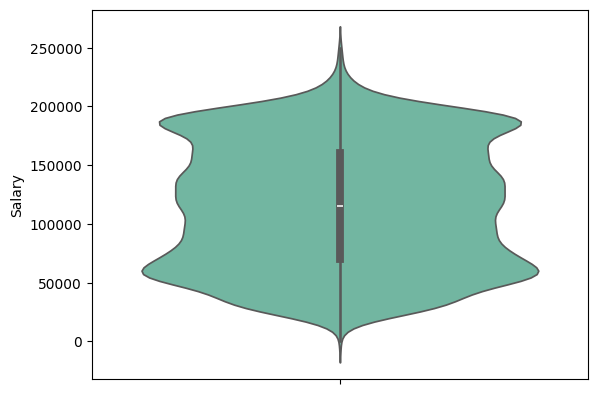

In [ ]:
sns.violinplot(df2['Salary'], palette=sns.color_palette('Set2'), inner = 'box');

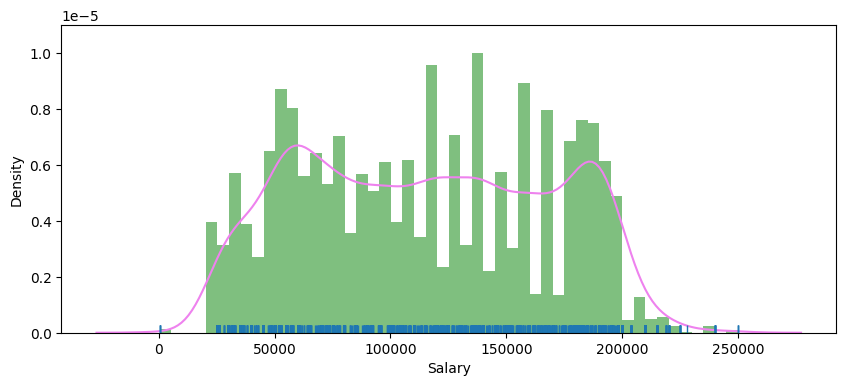

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df2['Salary'],
            kde_kws={'color':'violet'},#color de la linea
            hist_kws={ 'linewidth':3,
                     'alpha':0.5, 'color':'g'},
            bins = 50,
            rug=True);

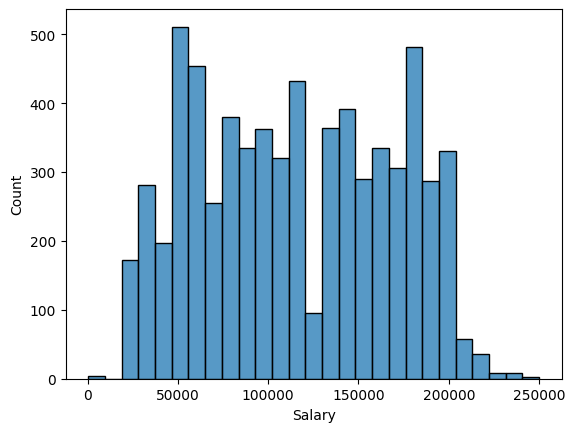

In [ ]:
sns.histplot(df2['Salary'], palette=sns.color_palette('Set2'));

### Salario data ###

In [ ]:
media = df_data['Salary'].mean()
moda= df_data['Salary'].mode()
mediana = df_data['Salary'].median()

print(f'La media de la muestra es {media}\nLa mediana es  {mediana}\nLa moda es {moda}')

var = np.var(df_data['Salary']);
print(f'La varianza de la muestra es {var}');


La media de la muestra es 148816.30546955625
La mediana es  150000.0
La moda es 0    140000.0
Name: Salary, dtype: float64
La varianza de la muestra es 1593442004.5134995


In [ ]:
print(df_data['Salary'].max())


print(df_data['Salary'].min())

# Rango 
print(df_data['Salary'].max() - df_data['Salary'].min())

240000.0
35000.0
205000.0


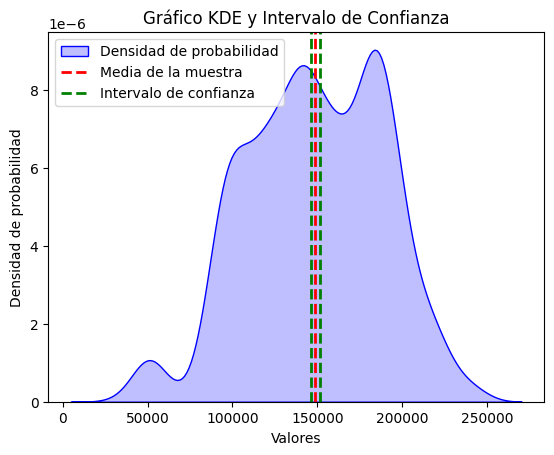

In [ ]:
# Calcular el intervalo de confianza para la media con un nivel de confianza del 95%
intervalo_confianza = stats.norm.interval(0.95, loc=np.mean(df_data['Salary']), scale=stats.sem(df_data['Salary']))

# Crear un gráfico KDE de los df_data['Salary']
sns.kdeplot(df_data['Salary'], shade=True, color='blue', label='Densidad de probabilidad')

# Agregar líneas para mostrar la media y el intervalo de confianza
media = np.mean(df_data['Salary'])
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media de la muestra')
plt.axvline(intervalo_confianza[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de confianza')
plt.axvline(intervalo_confianza[1], color='green', linestyle='dashed', linewidth=2)

# Agregar etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Gráfico KDE y Intervalo de Confianza')
plt.legend()

# Mostrar el gráfico
plt.show()

La asimetría es la medida que indica la simetría de la distribución de una variable respecto a la media aritmética

La curtosis (o apuntamiento) es una medida de forma que mide cuán escarpada o achatada está una curva o distribución.

Este coeficiente indica la cantidad de datos que hay cercanos a la media, de manera que a mayor grado de curtosis, más escarpada (o apuntada) será la forma de la curva.

In [ ]:
from scipy.stats import kurtosis, skew
kurtosis_valor = kurtosis(df_data['Salary'])
simetria_valor = skew(df_data['Salary'])

print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 3:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 3:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor > 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor < 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

kurtosis: -0.46
simetria: -0.21
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


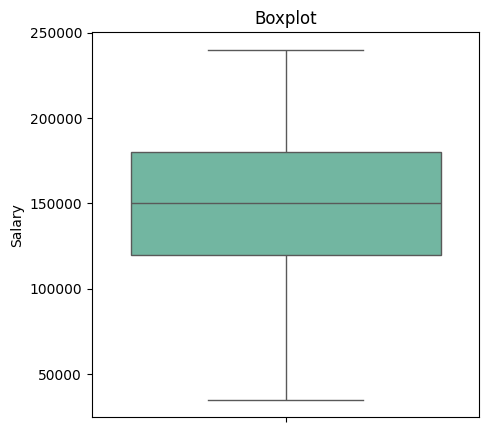

In [ ]:
plt.figure(figsize=(5,5))

sns.boxplot(data= df_data['Salary'], palette=sns.color_palette('Set2'))
plt.title('Boxplot');

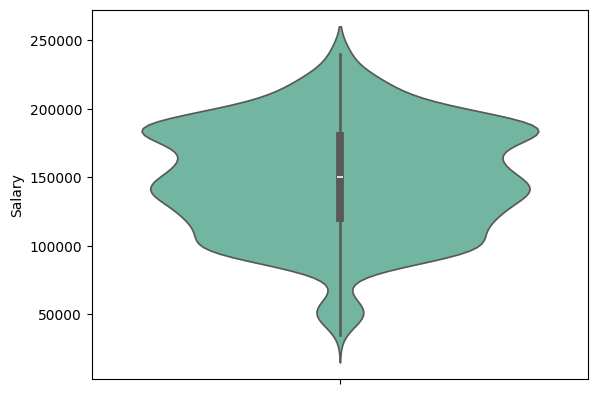

In [ ]:
sns.violinplot(df_data['Salary'], palette=sns.color_palette('Set2'), inner = 'box');

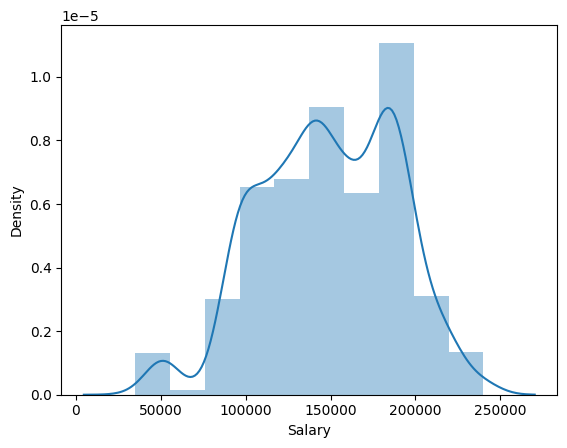

In [ ]:
sns.distplot(df_data['Salary'], bins=10);
# os sirve para ver la forma que tiene una variable, así como la probabilidad de aparición de cada uno de sus valores

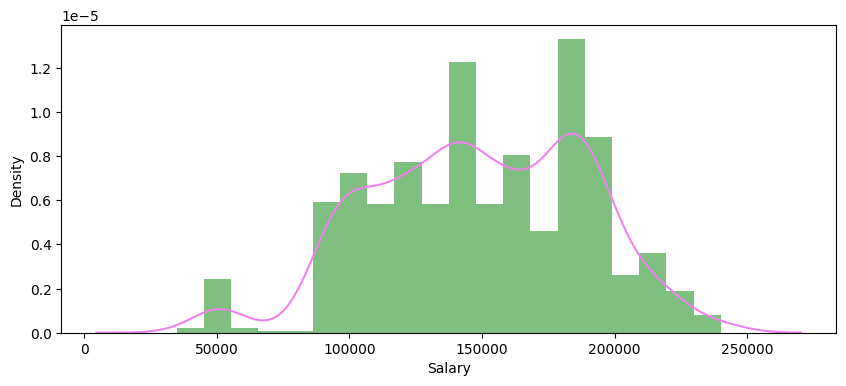

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df_data['Salary'],
            kde_kws={'color':'violet'}, #color de la linea
            hist_kws={ 'linewidth':3,
                     'alpha':0.5, 'color':'g'},
            bins = 20);

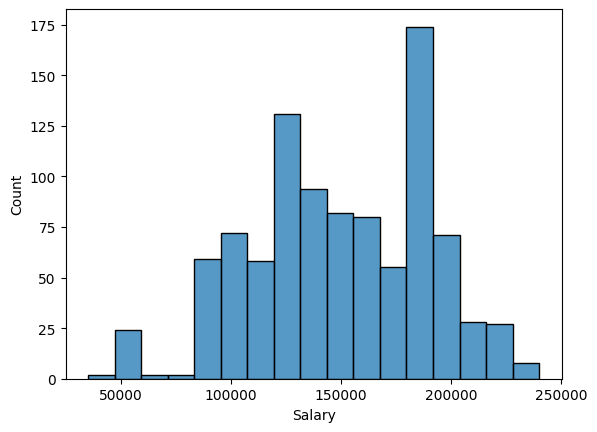

In [ ]:
sns.histplot(df_data['Salary'], palette=sns.color_palette('Set2'));

In [ ]:
from scipy.stats import shapiro
# Datos de ejemplo
datos = [23, 25, 27, 28, 30, 32, 33, 35, 35, 36]
# Prueba de Shapiro-Wilk
estadistico, p_valor = shapiro(df_data['Salary'])
print(f'Estadístico de Shapiro-Wilk: {estadistico}\nP-Valor: {p_valor}')
# Interpretación del resultado
if p_valor > 0.05:
    print('No hay evidencia para rechazar la hipótesis nula. Los datos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')


Estadístico de Shapiro-Wilk: 0.9807499051094055
P-Valor: 5.182805296044535e-10
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


## HIPOTESIS 2: ##
¿Qué relación existe entre el salario y el nivel de estudios dentro del campo de Data?
Relacion entre nivel educativo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.

In [173]:
df_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


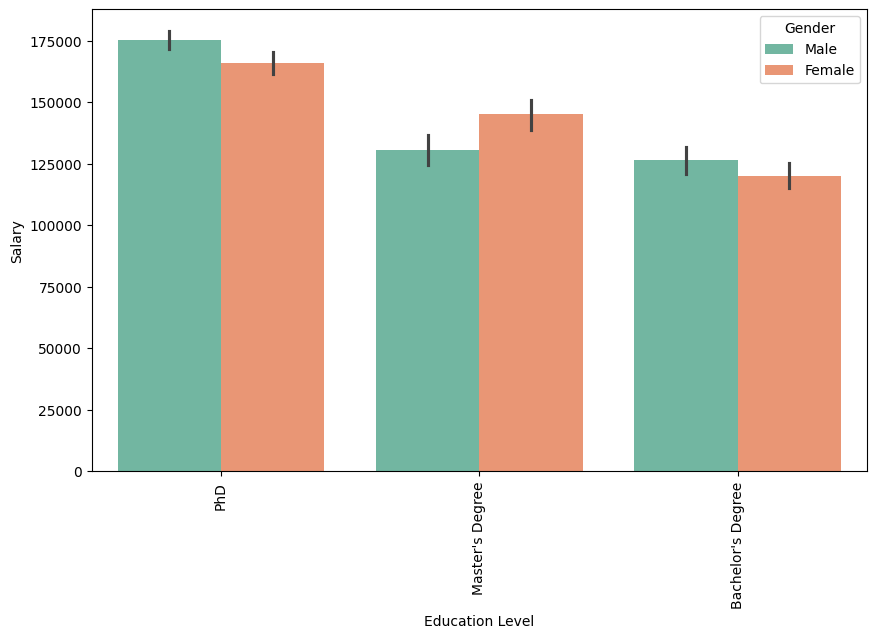

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Education Level', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

In [175]:
# Prueba de Kruskal-Wallis para más de dos muestras independientes
stat_kw, p_value_kw = kruskal(df_data['Salary'][df_data['Education Level'] == 'PhD'],
                               df_data['Salary'][df_data['Education Level'] == "Master's Degree"],
                               df_data['Salary'][df_data['Education Level'] == "Bachelor's Degree"])

alpha = 0.05  # Nivel de significancia

# Hipótesis nula (H0): No hay diferencia significativa en los salarios según el nivel alcanzado de estudios.
# Hipótesis alternativa (Ha): Existe al menos una diferencia significativa en los salarios según el nivel alcanzado de estudios.

print(f"\nPrueba de Kruskal-Wallis para más de dos muestras independientes: stat = {stat_kw}, p_value = {p_value_kw}")

if p_value_kw < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de al menos una diferencia significativa en los salarios según el nivel alcanzado de estudios.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en la calificación entre los grupos 1A, 1B y 1C.")



Prueba de Kruskal-Wallis para más de dos muestras independientes: stat = 269.9976845259498, p_value = 2.3482684427143934e-59
Rechazamos la hipótesis nula. Hay evidencia de al menos una diferencia significativa en la calificación entre los grupos 1A, 1B y 1C.


## HIPOTESIS 3: ##
¿Cuál es la diferencia de media de salarios entre los salarios relacionados con el data y lo de otros grupos de trabajo? Ej.: área de marketing, financiero y ventas.

ALTERNATIVA: dif cantidad entre hombres y mujeres// dif salarios en tre hombres y mujeres

In [179]:
df_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


In [198]:
gender = pd.DataFrame(df_data.groupby('Job Title')['Gender'].value_counts(normalize=True))
gender

proportion
Job Title                Gender            
Chief Data Officer       Male      1.000000
Data Entry Clerk         Female    1.000000
Director of Data Science Male      0.543860
                         Female    0.456140
Junior Data Analyst      Male      0.648980
                         Female    0.351020
Junior Data Scientist    Female    0.600000
                         Male      0.400000
Senior Data Analyst      Male      0.705479
                         Female    0.294521
Senior Data Engineer     Female    0.500000
                         Male      0.500000
Senior Data Scientist    Male      0.610309
                         Female    0.389691

In [213]:
gender.unstack()

proportion          
Gender                       Female      Male
Job Title                                    
Chief Data Officer              NaN  1.000000
Data Entry Clerk           1.000000       NaN
Director of Data Science   0.456140  0.543860
Junior Data Analyst        0.351020  0.648980
Junior Data Scientist      0.600000  0.400000
Senior Data Analyst        0.294521  0.705479
Senior Data Engineer       0.500000  0.500000
Senior Data Scientist      0.389691  0.610309

<Axes: >

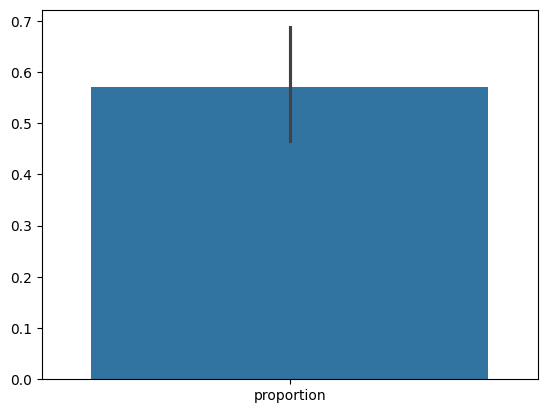

In [214]:
sns.barplot(gender)

## HIPOTESIS 4: ##
¿Qué relación tiene los años de experiencia y el salario?
Relacion entre años de experiencia y salario.
Hipotesis nula, a mayor tiempo trabajado, mayor salario.

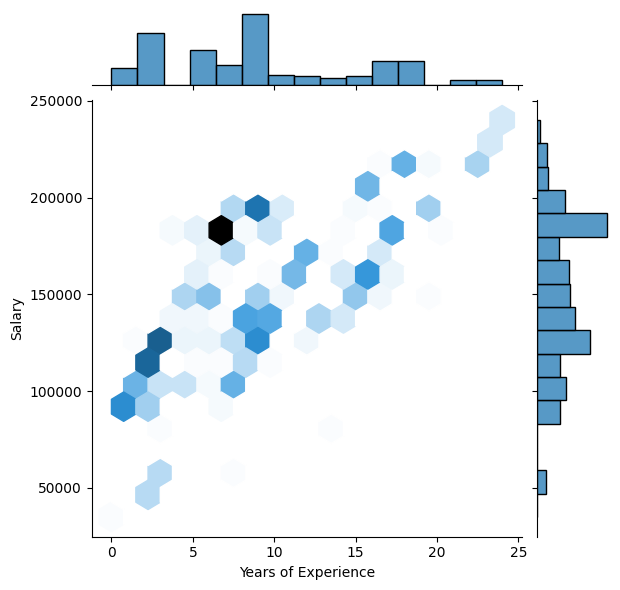

In [133]:
sns.jointplot(data = df_data, x = 'Years of Experience', y='Salary',  kind = 'hex');


- La [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) trata de establecer la relación o **dependencia que existe entre las dos variables que intervienen en una distribución bidimensional**. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es **positiva** cuando los valores de las variables aumenta juntos; y es **negativa** cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.

Por suerte el coeficiente de correlación de Pearson está normalizado y se puede interpretar de manera sencilla:

* Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si 0 < r < 1, existe una correlación positiva.
* Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
* Si -1 < r < 0, existe una correlación negativa.
* Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

In [134]:
np.corrcoef(df_data['Years of Experience'], df_data['Salary'])

array([[1.        , 0.71282707],
       [0.71282707, 1.        ]])

In [139]:
print(np.var(df_data['Years of Experience']))
print(np.var(df_data['Salary']))

33.108604084727695
1593442004.5134995


- Covarianza
La [covarianza](https://es.wikipedia.org/wiki/Covarianza) es el equivalente de la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias respectivas.La covarianza indica el sentido de la correlación entre las variables; Si $\sigma_{xy} > 0$ la correlación es directa; Si $\sigma_{xy} < 0$ la correlación es inversa.

In [137]:
np.cov(df_data['Years of Experience'], df_data['Salary'])

array([[3.31428072e+01, 1.63897063e+05],
       [1.63897063e+05, 1.59508812e+09]])

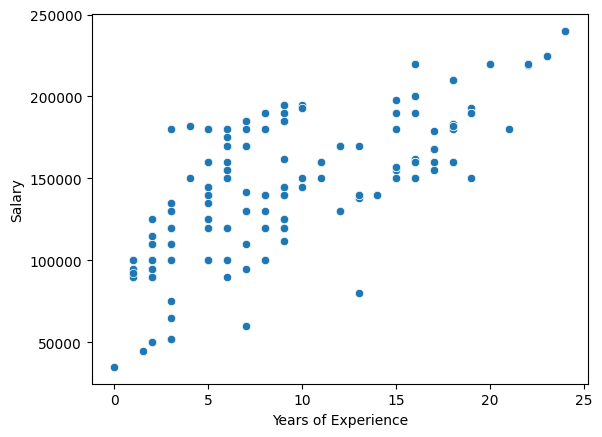

In [135]:
sns.scatterplot(data=df_data,x = 'Years of Experience', y='Salary', palette=sns.color_palette('Set2'));

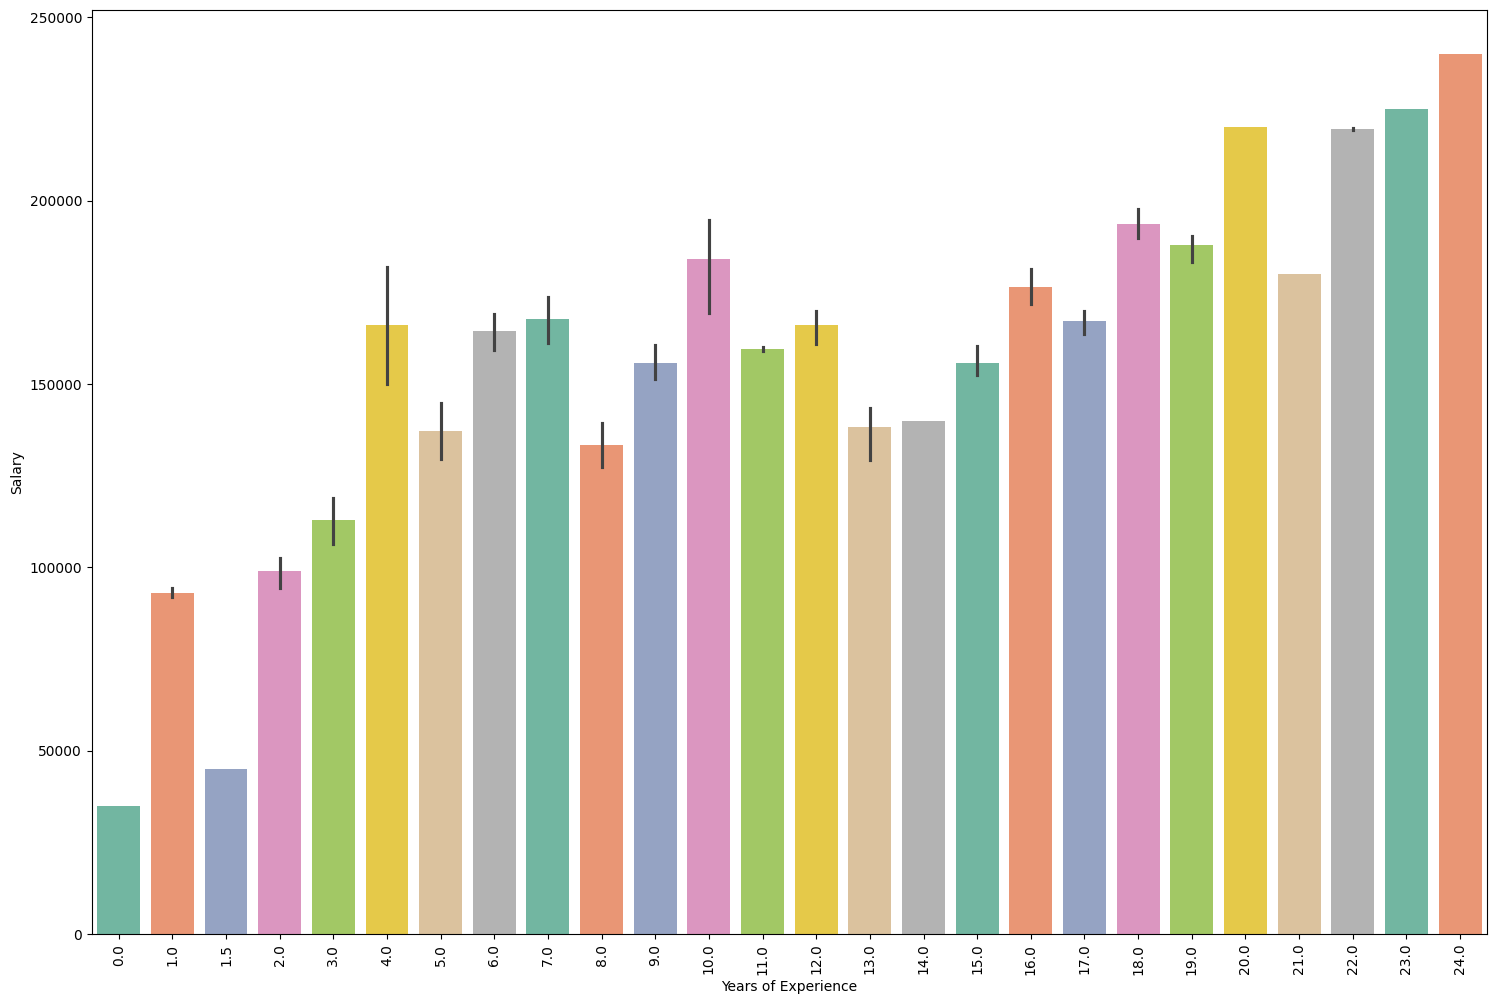

In [158]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

In [178]:
df_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


## HIPOTESIS 5: ##
 ¿Dentro del campo de data, hay diferencias entre los salarios de hombre y mujeres?
 Relacion entre puestos de trabajo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.



In [205]:
df3 = pd.DataFrame(df_data.groupby(['Job Title', 'Gender'])['Salary'].mean().round(2))
df3

Salary
Job Title                Gender           
Chief Data Officer       Male    220000.00
Data Entry Clerk         Female   35000.00
Director of Data Science Female  200769.23
                         Male    207741.94
Junior Data Analyst      Female  112500.00
                         Male    102566.04
Junior Data Scientist    Female  126500.00
                         Male    117083.33
Senior Data Analyst      Female  119883.72
                         Male    155524.27
Senior Data Engineer     Female  160000.00
                         Male    150000.00
Senior Data Scientist    Female  166111.11
                         Male    167006.76

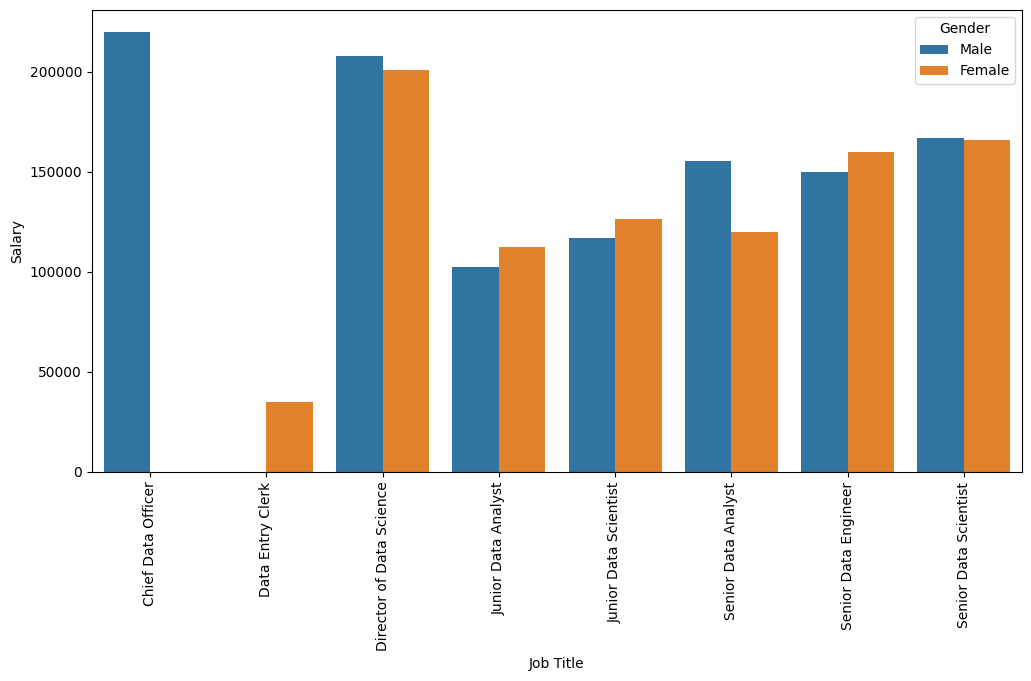

In [206]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Job Title',y= 'Salary', hue='Gender',data=df3)
plt.xticks(rotation=90)
plt.show()

In [207]:
df4 = pd.DataFrame(df_data.groupby(['Job Title','Gender'])['Gender'].count().round(2))
df4

Gender
Job Title                Gender        
Chief Data Officer       Male         1
Data Entry Clerk         Female       1
Director of Data Science Female      26
                         Male        31
Junior Data Analyst      Female      86
                         Male       159
Junior Data Scientist    Female      18
                         Male        12
Senior Data Analyst      Female      43
                         Male       103
Senior Data Engineer     Female       2
                         Male         2
Senior Data Scientist    Female     189
                         Male       296

In [208]:
df4_unstacked = df4.unstack(level='Gender')
df4_unstacked.columns = df4_unstacked.columns.droplevel()
df4_unstacked


Gender,Female,Male
Job Title,,
Chief Data Officer,NaN,1.0
Data Entry Clerk,1.0,NaN
Director of Data Science,26.0,31.0
Junior Data Analyst,86.0,159.0
Junior Data Scientist,18.0,12.0
Senior Data Analyst,43.0,103.0
Senior Data Engineer,2.0,2.0
Senior Data Scientist,189.0,296.0


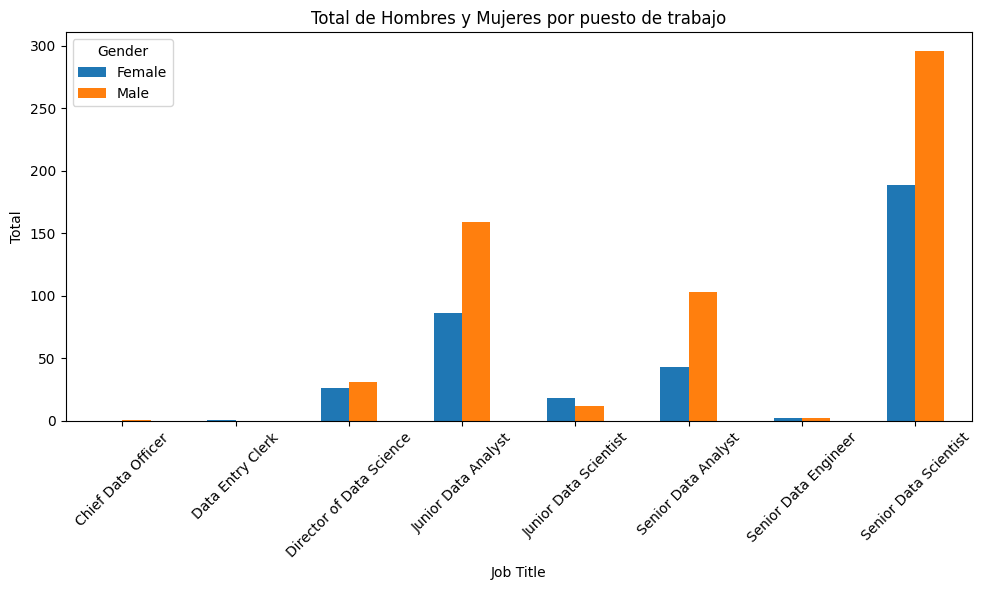

In [209]:
df4_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Job Title')
plt.ylabel('Total')
plt.title('Total de Hombres y Mujeres por puesto de trabajo')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [210]:
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df_data['Salary'][df_data['Gender'] == 'Male'],
                                    df_data['Salary'][df_data['Gender'] == 'Female'])

# Hipótesis nula (H0): No hay diferencia significativa entre los salarios de las mujeres y los salarios de los hombres en el campo de data.
# Hipótesis alternativa (Ha): Existe una diferencia significativa entre los salarios de las mujeres y los salarios de los hombres en el campo de data.

alpha = 0.05  # Nivel de significancia

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa entre los salarios de las mujeres y los salarios de los hombres en el campo de data.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa entre los salarios de las mujeres y los salarios de los hombres en el campo de data.")



Prueba de Mann-Whitney para dos muestras independientes: stat = 112462.0, p_value = 0.5965365185160392
No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa entre los salarios de los junior data scientist y data analyst.


## HIPOTESIS 6: ##
Dentro del campo de data, ¿quién tiene mayor salario de entrada?

In [140]:
df_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


In [159]:
df9 = df_data[df_data['Job Title'].str.contains('Junior', case= False)]
df9 =pd.DataFrame(df9.groupby('Job Title')['Salary'].mean())


In [162]:
df9

,Salary
Job Title,
Junior Data Analyst,106053.061224
Junior Data Scientist,122733.333333


<Axes: xlabel='Job Title', ylabel='Salary'>

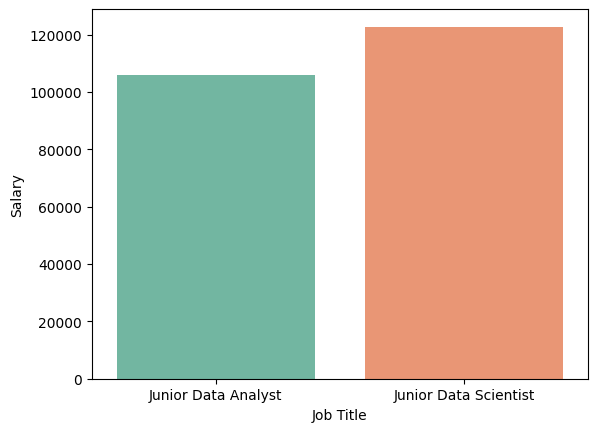

In [155]:
sns.barplot(df9, palette=sns.color_palette('Set2'))

In [211]:
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df_data['Salary'][df_data['Job Title'] == 'Junior Data Analyst'],
                                    df_data['Salary'][df_data['Job Title'] == 'Junior Data Scientist'])

# Hipótesis nula (H0): No hay diferencia significativa entre los salarios de los junior data scientist y data analyst.
# Hipótesis alternativa (Ha): Existe una diferencia significativa entre los salarios de los junior data scientist y data analyst.

alpha = 0.05  # Nivel de significancia

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa entre los salarios de los junior data scientist y data analyst.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa entre los salarios de los junior data scientist y data analyst.")



Prueba de Mann-Whitney para dos muestras independientes: stat = 2784.0, p_value = 0.029182363439840153
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa entre los salarios de los junior data scientist y data analyst.


## HIPOTESIS 7: ##

Dentro del campo de data, cuál es la media de edad de los trabajadores Junior? Hay diferencia entre la media de edad entre hombres y mujeres junior?

In [165]:
df10 = df_data[df_data['Job Title'].str.contains('Junior', case= False)]
df10

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
999,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
...,...,...,...,...,...,...
4772,28.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,52000.0
4782,28.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,52000.0
4641,27.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,50000.0
4661,27.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,50000.0


In [169]:
df10 =pd.DataFrame(df10.groupby('Job Title')['Age'].mean().round(2))
df10


,Age
Job Title,
Junior Data Analyst,25.87
Junior Data Scientist,28.10


In [172]:
df10.unstack

<bound method DataFrame.unstack of                          Age
Job Title                   
Junior Data Analyst    25.87
Junior Data Scientist  28.10>

<Axes: >

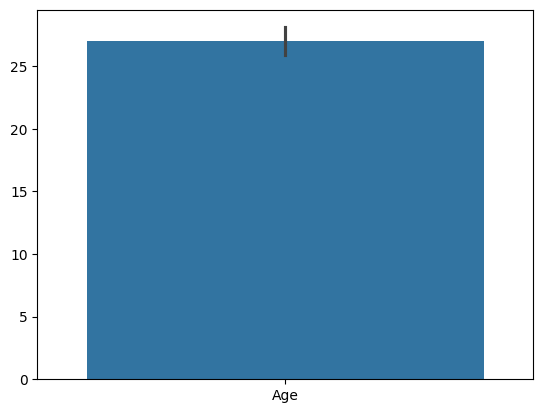

In [171]:
sns.barplot(df10)

## Analisis ANTERIOR



### Analsis Univariante


- teorema limite central  (med, mod, median)
- muestra media moda y median y sus distribuciones
- distribución por especie
- conteo de valores por especies y % del total
- distrib sexos
- graficar desv estandar y varienza
distribuciones rango, max, min

**VARIABLES CUALITATIVAS**

<Figure size 1200x600 with 0 Axes>

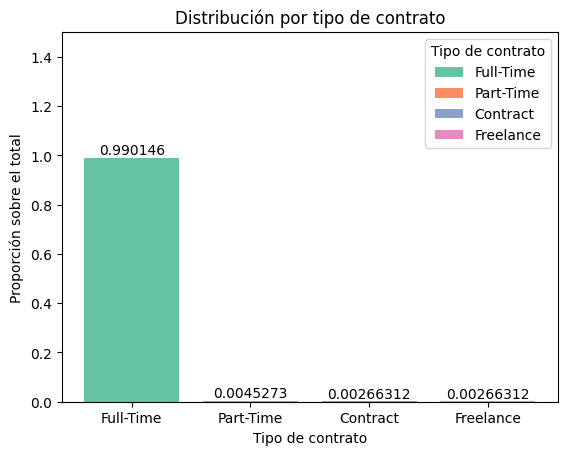

In [ ]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
bar_labels = labels.keys()
employ_type_plot = plt.bar(labels.keys(), labels.values(), label = labels.keys(),color= sns.color_palette('Set2'));

ax.set_title('Distribución por tipo de contrato')
ax.legend(title='Tipo de contrato')
ax.set(ylabel='Proporción sobre el total', ylim=(0, 1.5))
ax.set(xlabel='Tipo de contrato')
bar_container = ax.bar(labels.keys(), labels.values(), color= sns.color_palette('Set2'))
ax.bar_label(bar_container,)
plt.show();

In [ ]:
ratio_trans = ratio.transpose()

C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1643457176.py:2: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))


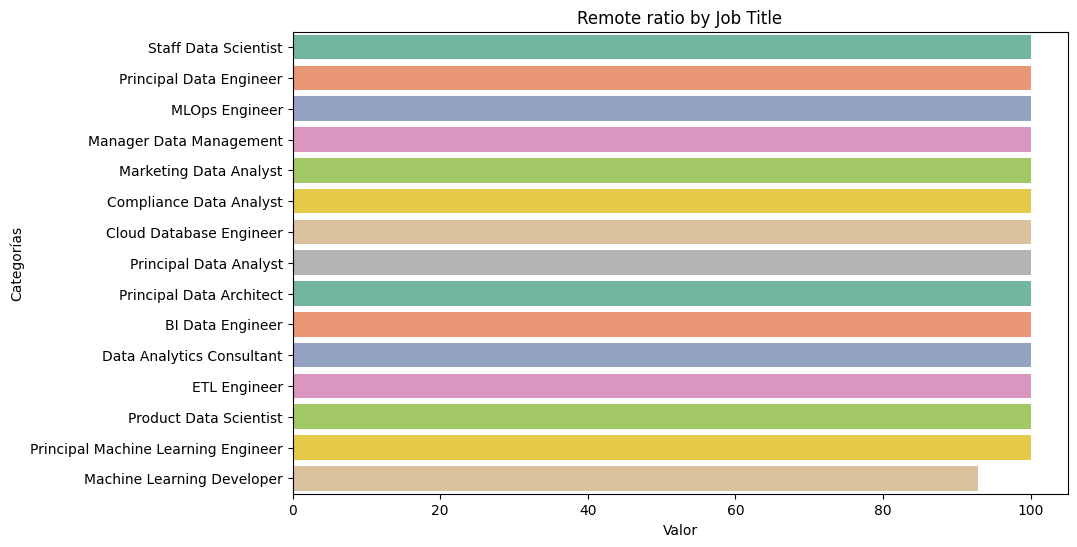

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))
plt.xlabel('Valor')
plt.ylabel('Categorías')
plt.title('Remote ratio by Job Title')
plt.show()


In [ ]:
top_salary_job = pd.DataFrame(df.groupby('job_title')['salary'].mean().round(2))
top_salary_job.sort_values(by='salary', inplace=True, ascending=False)
top_salary_job = top_salary_job[:15]
top_salary_job

,salary
job_title,
Head of Machine Learning,6000000.00
Principal Data Architect,3000000.00
Lead Machine Learning Engineer,2548666.67
Lead Data Scientist,928485.33
Data Analytics Lead,922500.00
BI Data Analyst,836644.80
Head of Data Science,703729.44
Lead Data Analyst,655000.00
ML Engineer,609997.91


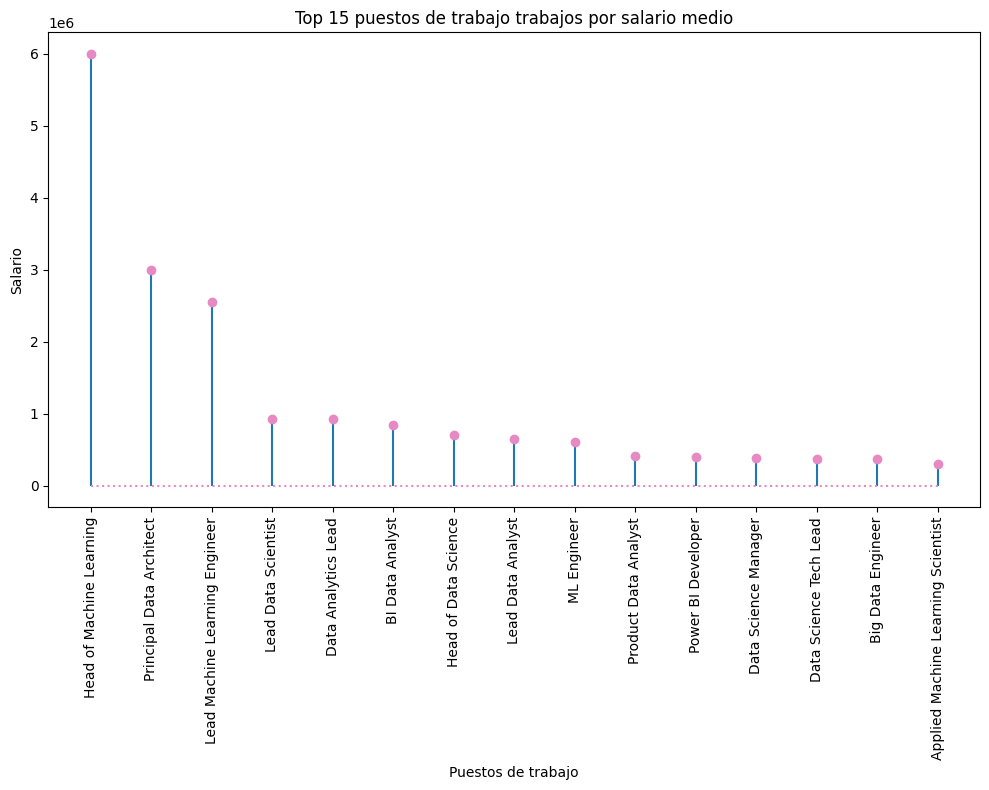

In [ ]:
plt.figure(figsize=(10, 8))
plt.stem(top_salary_job.index, top_salary_job['salary'], markerfmt='o', linefmt='-', basefmt=':')

colors = sns.color_palette('Set2')
plt.setp(plt.gca().get_lines(), color=colors[3])

plt.xticks(rotation=90)
plt.xlabel('Puestos de trabajo')
plt.ylabel('Salario')
plt.title('Top 15 puestos de trabajo trabajos por salario medio')
plt.tight_layout()
plt.show()

In [ ]:
jobs = df['job_title'].value_counts()[:15].to_dict()


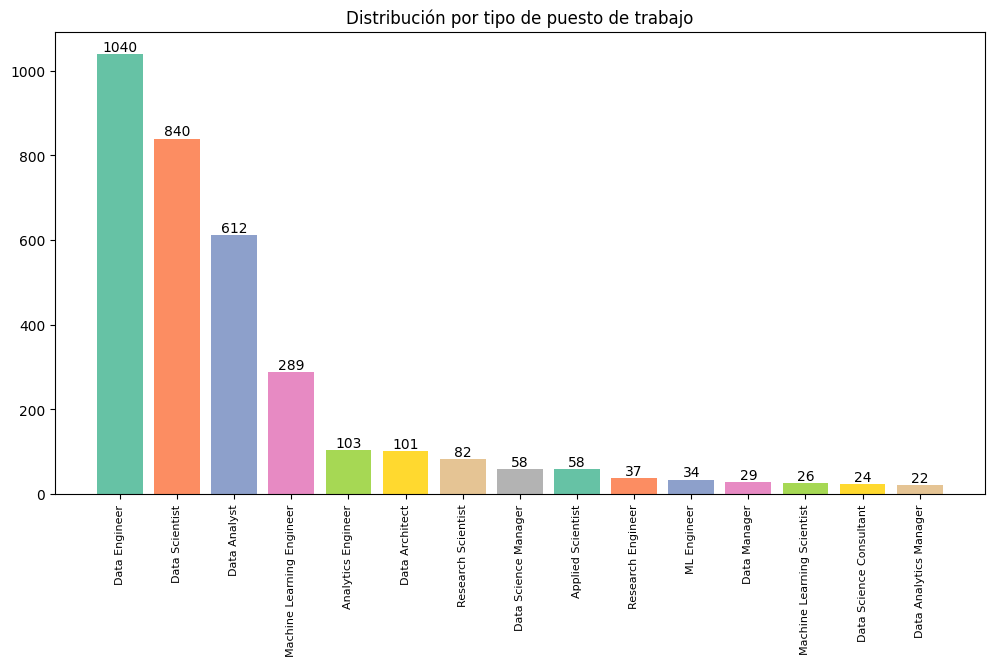

In [ ]:
plt.figure(figsize=(12,6))
employ_name = plt.bar(jobs.keys(), jobs.values(), label = jobs.keys(),color= sns.color_palette('Set2'));

plt.title('Distribución por tipo de puesto de trabajo')
plt.xticks(rotation= 90, fontsize= 8)
bar_container = plt.bar(jobs.keys(), jobs.values(), color= sns.color_palette('Set2'))
plt.bar_label(bar_container,)

plt.show();



In [ ]:
emply_res = pd.DataFrame(df['employee_residence'].value_counts()[:20])
emply_res.reset_index(inplace=True)

In [ ]:
country_names = {
                    'US': 'Estados Unidos',
                    'GB': 'Reino Unido',
                    'CA': 'Canadá',
                    'ES': 'España',
                    'IN': 'India',
                    'DE': 'Alemania',
                    'FR': 'Francia',
                    'PT': 'Portugal',
                    'BR': 'Brasil',
                    'GR': 'Grecia',
                    'NL': 'Países Bajos',
                    'AU': 'Australia',
                    'MX': 'México',
                    'IT': 'Italia',
                    'PK': 'Pakistán',
                    'JP': 'Japón',
                    'IE': 'Irlanda',
                    'NG': 'Nigeria',
                    'AT': 'Austria',
                    'AR': 'Argentina'}

C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))


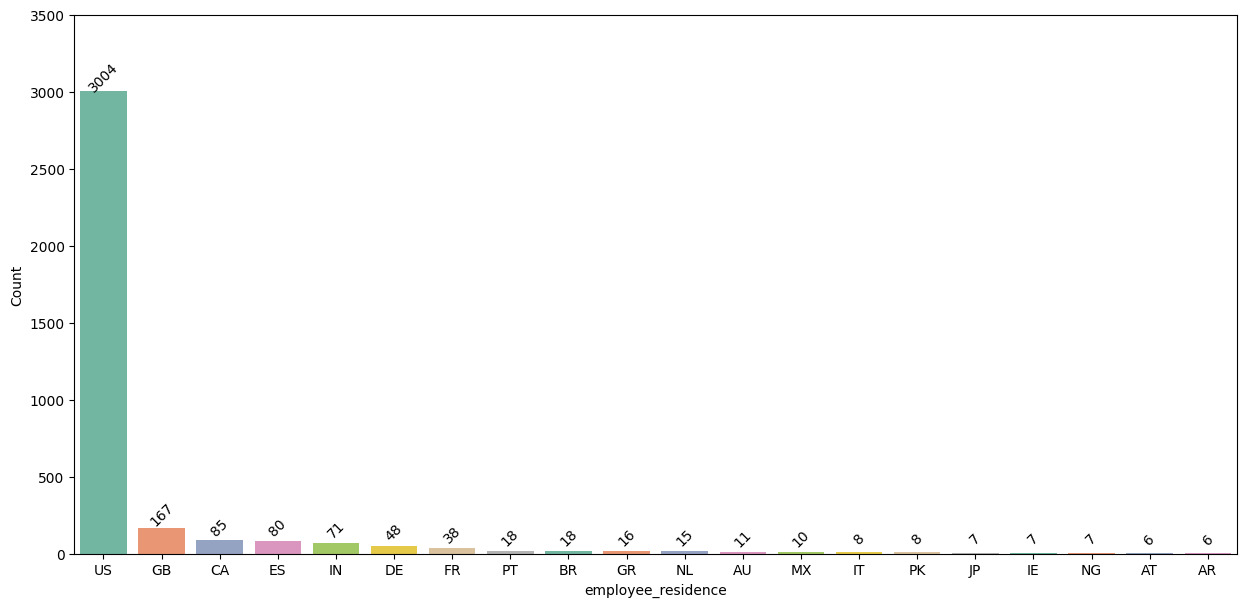

In [ ]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
comp_loc = pd.DataFrame(df['company_location'].value_counts()[:20])


C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))


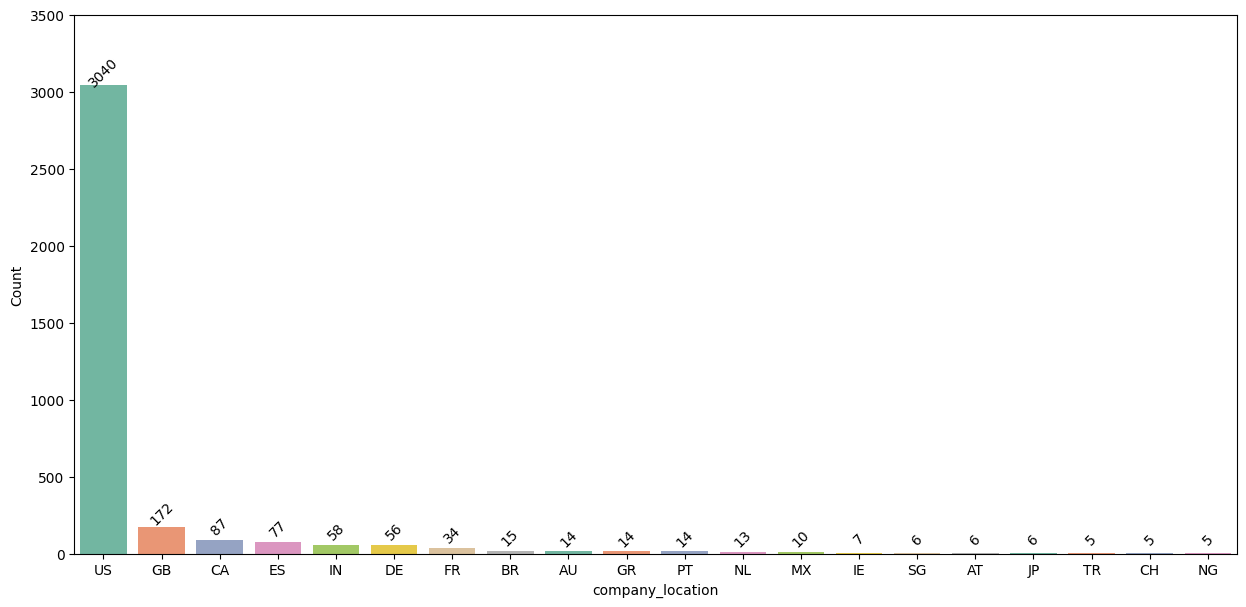

In [ ]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
sizes =df['company_size'].value_counts()
sizes

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))


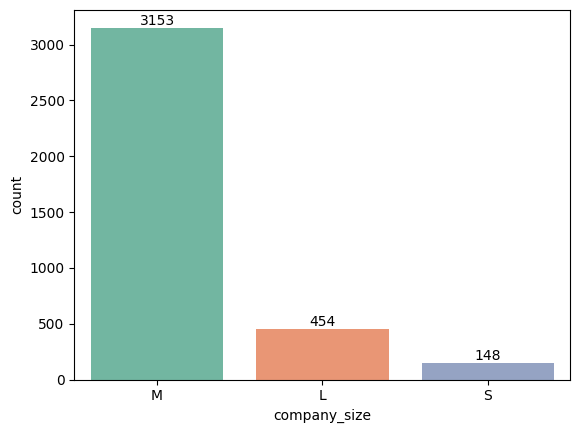

In [ ]:
plt.figure()
ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))

for i in ax.containers:
    ax.bar_label(i,)

 sns.barplot method will return a list of sub methods. use containers method to access  the text label of each bar by passing it  through the ax.bar_label function use for loop to iterate through the list of labels and assign each bar to a different  label.

In [ ]:
df.select_dtypes('object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ESP,ESP,L
1,MI,CT,ML Engineer,USA,USA,S
2,MI,CT,ML Engineer,USA,USA,S
3,SE,FT,Data Scientist,CAN,CAN,M
4,SE,FT,Data Scientist,CAN,CAN,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USA,USA,L
3751,MI,FT,Principal Data Scientist,USA,USA,L
3752,EN,FT,Data Scientist,USA,USA,S
3753,EN,CT,Business Data Analyst,USA,USA,L


In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [ ]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country

In [ ]:
residence = df['employee_residence'].value_counts()
px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.Plotly3,
                    title = 'Employee Loaction On Map')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'locations=%{location}<br>color=%{z}<extra></extra>',
              'locations': array(['USA', 'GBR', 'CAN', 'ESP', 'IND', 'DEU', 'FRA', 'PRT', 'BRA', 'GRC',
                                  'NLD', 'AUS', 'MEX', 'ITA', 'PAK', 'JPN', 'IRL', 'NGA', 'AUT', 'ARG',
                                  'POL', 'PRI', 'TUR', 'BEL', 'SGP', 'RUS', 'LVA', 'UKR', 'COL', 'CHE',
                                  'SVN', 'BOL', 'DNK', 'HRV', 'HUN', 'ROU', 'THA', 'ARE', 'VNM', 'HKG',
                                  'UZB', 'PHL', 'CAF', 'CHL', 'FIN', 'CZE', 'SWE', 'ASM', 'LTU', 'GHA',
                                  'KEN', 'DZA', 'NZL', 'JEY', 'MYS', 'MDA', 'IRQ', 'BGR', 'LUX', 'SRB',
                                  'HND', 'EST', 'TUN', 'CRI', 'IDN', 'EGY', 'DOM', 'CHN', 'SVK', 'IRN',
                                  'MAR', 'ISR', 'MKD', 'BIH', 'ARM', 'CYP', 'KWT', 'MLT'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([3004,  167,   85,   80,   71,   48,   38,   18,   18,   16,   15,   11,
                            10,    8,    8,    7,    7,    7,    6,    6,    6,    5,    5,    5,
                             5,    4,    4,    4,    4,    4,    4,    3,    3,    3,    3,    3,
                             3,    3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
                             2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0508b8'],
                                            [0.08333333333333333, '#1910d8'],
                                            [0.16666666666666666, '#3c19f0'],
                                            [0.25, '#6b1cfb'], [0.3333333333333333,
                                            '#981cfd'], [0.4166666666666667,
                                            '#bf1cfd'], [0.5, '#dd2bfd'],
                                            [0.5833333333333334, '#f246fe'],
                                            [0.6666666666666666, '#fc67fd'], [0.75,
                                            '#fe88fc'], [0.8333333333333334,
                                            '#fea5fd'], [0.9166666666666666,
                                            '#febefe'], [1.0, '#fec3fe']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Employee Loaction On Map'}}
})

**VARIABLES CUANTITATIVAS**

In [ ]:
df.select_dtypes(exclude='object')

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


### AnalIsis Bivariante

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ESP,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USA,100,US,S
2,2023,MI,CT,ML Engineer,25500,USA,100,US,S
3,2023,SE,FT,Data Scientist,175000,CAN,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CAN,100,CA,M


In [ ]:
loc= df['company_location'].value_counts()
top_15= loc[:20]
resid= df['employee_residence'].value_counts()
top_res= resid[:20]

In [ ]:
data1 = pd.DataFrame((resid, top_15))
data1

,count,count
USA,3004.0,NaN
GBR,167.0,NaN
CAN,85.0,NaN
ESP,80.0,NaN
IND,71.0,NaN
...,...,...
AT,NaN,6.0
JP,NaN,6.0
TR,NaN,5.0
CH,NaN,5.0


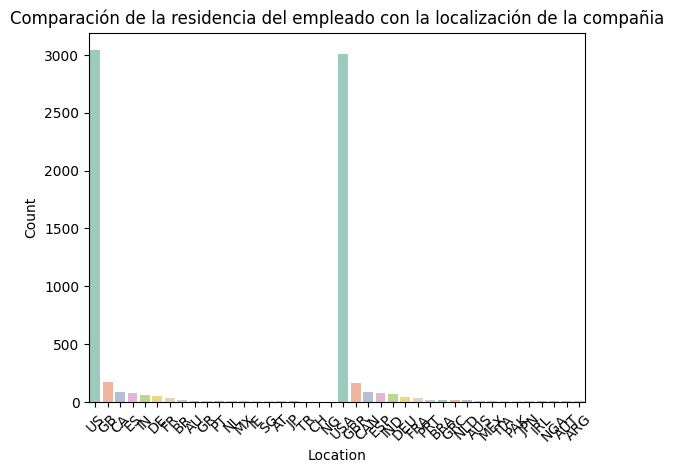

In [ ]:

plt.figure()

sns.barplot(x=top_15.index, y=top_15.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Employee Residence')
sns.barplot(x=top_res.index, y=top_res.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Company Location')
# COMBIAR AMBOS

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparación de la residencia del empleado con la localización de la compañia')


plt.xticks(rotation=45)

plt.show()

In [ ]:
group = pd.DataFrame(df.groupby(['experience_level','company_size']).size())
group

0
experience_level company_size      
EN               L              100
                 M              171
                 S               49
EX               L               13
                 M               95
                 S                6
MI               L              134
                 M              621
                 S               50
SE               L              207
                 M             2266
                 S               43

In [ ]:
plt.figure()

sns.countplot(x=exp_size.index, data=exp_size, hue = group['company_size'])

NameError: name 'exp_size' is not defined

<Figure size 640x480 with 0 Axes>

### Analsis Multivariante

In [ ]:
df.select_dtypes(exclude=['object']).corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000
